# Data exploration and Dimensionality reduction

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction

1. Reading the file
2. Missing Values
3. Impute with scikit-learn
4. Implement imputation
5. Plotting
6. Standardization
7. Dimensionality reduction
8. Multi-Dimensional Scaling

In [1]:
# these are the libraries that I need for this EDA project
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap


RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

I will use **Pima Indians Diabetes Database** that is publicly available and from UCI. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

In [2]:
data = pd.DataFrame(pd.read_csv("diabetes.csv"))

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Some values are abnormal since Glucose or BMI cannot be zero, so plot the insensical value with bar chart



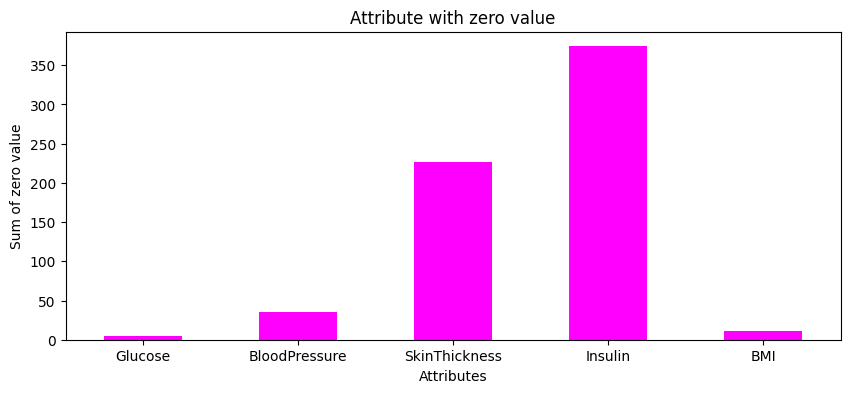

In [6]:
columns_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
sum_of_zero_values = (data[columns_with_zero_values] == 0).sum()
sum_of_zero_values.plot(kind='bar', figsize=(10, 4), color='magenta')
plt.title('Attribute with zero value')
plt.ylabel('Sum of zero value')
plt.xlabel('Attributes')
plt.xticks(rotation = 360)
plt.show()

## Impute the zero value with scikit-learn using mean value

In [7]:
data_imputed = data.copy()
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_part = data_imputed[columns_to_impute].replace(0, np.nan)
imputer = SimpleImputer(strategy='mean')
df_converted = pd.DataFrame(imputer.fit_transform(df_part), columns=columns_to_impute)
data_imputed[columns_to_impute] = pd.DataFrame(df_converted)

In [8]:
imputer.statistics_

array([121.68676278,  72.40518417,  29.15341959, 155.54822335,
        32.45746367])

In [9]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Here I will write a function that changes the zero (or nan) value to the mean of the attribute of a dataframe.

In [10]:
def imputation(dataset, columns_to_imputed):

    dataset_columns_to_imputed = dataset[columns_to_imputed]
    dataset_columns_to_imputed = dataset_columns_to_imputed.replace(0, np.nan)
    dataset_columns_to_imputed = dataset_columns_to_imputed.apply(lambda column: column.fillna(column.mean()))
    dataset[columns_to_imputed] = dataset_columns_to_imputed

    return dataset 

In [11]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
diabetes_1 = imputation(data, columns)

In [12]:
# Test that this function gives the same result 

try:
    np.testing.assert_allclose(data_imputed.values, diabetes_1.values)
    print("result: equal")
except:
    print("result: not equal")



result: equal


## Explore the attribute 'Glucose' with plotting. 

Text(0, 0.5, 'BloodPressure')

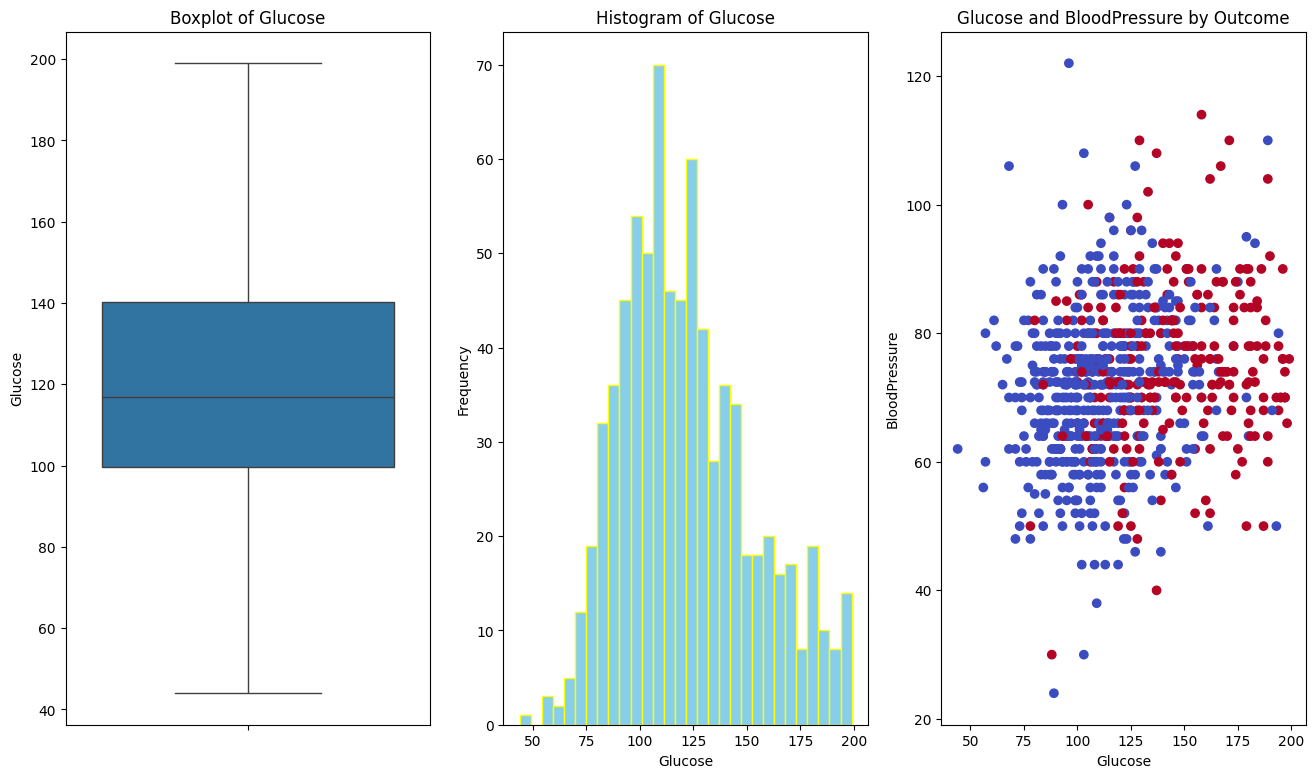

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16,9))

sns.boxplot(data=data_imputed, y='Glucose', ax=ax[0])
ax[0].set_title('Boxplot of Glucose')

ax[1].hist(data_imputed['Glucose'], bins=30, color='skyblue', edgecolor='yellow')
ax[1].set_title('Histogram of Glucose')
ax[1].set_xlabel('Glucose')
ax[1].set_ylabel('Frequency')

scatter = ax[2].scatter(data_imputed['Glucose'], data_imputed['BloodPressure'], c=data_imputed['Outcome'], cmap='coolwarm')
ax[2].set_title('Glucose and BloodPressure by Outcome')
ax[2].set_xlabel('Glucose')
ax[2].set_ylabel('BloodPressure')

Glucose distribution is fairly symmetric with moderate spread, and most values fall between 100 and 140 

The histogram confirms that most individuals have moderate Glucose levels, with fewer high values.

The scatter plot suggests a potential relationship between Glucose levels and outcomes, with one group (likely associated with higher Glucose values) possibly being indicative of a condition like diabetes.

## Data Standardization before Dimensionality Reduction

In [15]:
X = data_imputed.drop(columns=['Outcome'])
y = data_imputed['Outcome']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
data_standardized = pd.DataFrame(X_standardized, columns=X.columns)

In [16]:
data_standardized.mean()

Pregnancies                -6.476301e-17
Glucose                    -3.561966e-16
BloodPressure               6.915764e-16
SkinThickness               7.956598e-16
Insulin                    -3.330669e-16
BMI                         3.515706e-16
DiabetesPedigreeFunction    2.451743e-16
Age                         1.931325e-16
dtype: float64

In [17]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Dimensionality Reduction

## a.PCA

In [18]:
pca = PCA(n_components=2, random_state=8)
pca.fit(data_standardized)
explained_variance_ratio =  pca.explained_variance_ratio_
df_principal_components = pd.DataFrame(pca.components_, columns=data_standardized.columns,  index=['PC1', 'PC2'])

In [19]:
df_principal_components

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.308371,0.421065,0.378498,0.390485,0.320583,0.390827,0.146564,0.393539
PC2,0.552069,-0.068170,0.139202,-0.347245,-0.152909,-0.437935,-0.271494,0.511603


PC1 has positive coefficients for all variables, meaning it is a weighted combination of all these features, and they all contribute positively to this component. Features like Glucose, BMI, and Age seem to have the highest contributions.

PC2 is capturing variability that contrasts some of these features. For example, individuals with higher pregnancies and age may have lower BMI or insulin levels in this component.

In [20]:
explained_variance_ratio

array([0.28750131, 0.18411087])

## b.Multi-Dimensional Scaling



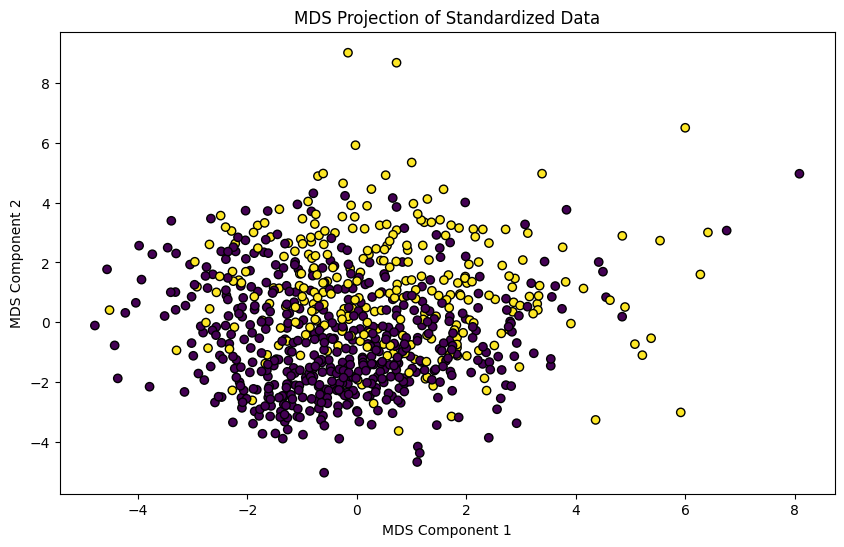

In [28]:
mds = MDS(n_components=2, random_state=8, dissimilarity='euclidean')
X_2d_a = mds.fit_transform(data_standardized)
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_2d_a[:, 0], X_2d_a[:, 1], c=data_imputed['Outcome'], cmap='viridis', edgecolor='k')
plt.title("MDS Projection of Standardized Data")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.show()

The clustering and distribution of points suggest there may be underlying patterns or separations between different groups within the dataset. However, the overlap of colors indicates that the separation between these groups may not be perfectly clear-cut.